# Example Exploration
This notebook demonstrates basic data loading and model training.

In [3]:
import sys
from pathlib import Path
# Add project root to sys.path so 'src' can be imported
sys.path.append(str(Path().resolve().parent))
import pandas as pd
from src.data_loader import load_csv
from src.model_train import train_model

In [5]:
# Create a sample CSV file for testing
import pandas as pd
import os
os.makedirs('../data', exist_ok=True)
df_sample = pd.DataFrame({
    'feature1': [1, 2, 3, 4],
    'feature2': [10, 20, 30, 40],
    'target': [0, 1, 0, 1]
})
df_sample.to_csv('../data/sample_data.csv', index=False)
print('Sample CSV created at ../data/sample_data.csv')

Sample CSV created at ../data/sample_data.csv


In [6]:
# Load the sample data and train a model
df = load_csv('sample_data.csv')
print('Loaded Data:')
print(df)
model = train_model('sample_data.csv')

Loaded Data:
   feature1  feature2  target
0         1        10       0
1         2        20       1
2         3        30       0
3         4        40       1
Accuracy: 0.00


## Next Steps: Visualize Data and Predictions

Now that you have loaded your data and trained a model, you can:
- Visualize the data and model predictions
- Try different models or parameters
- Add more features or data

Below is an example to visualize the data and predictions.

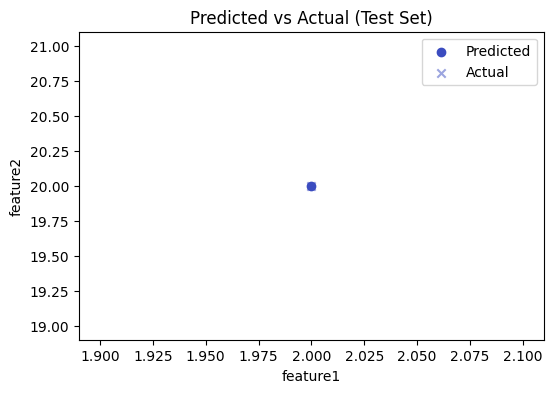

In [7]:
# Visualize the data and model predictions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Reload data and split for visualization
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predict on test set
if hasattr(model, 'predict'):
    y_pred = model.predict(X_test)
    plt.figure(figsize=(6,4))
    plt.scatter(X_test['feature1'], X_test['feature2'], c=y_pred, cmap='coolwarm', marker='o', label='Predicted')
    plt.scatter(X_test['feature1'], X_test['feature2'], c=y_test, cmap='coolwarm', marker='x', label='Actual', alpha=0.5)
    plt.xlabel('feature1')
    plt.ylabel('feature2')
    plt.title('Predicted vs Actual (Test Set)')
    plt.legend(['Predicted','Actual'])
    plt.show()
else:
    print('Model does not support prediction.')

In [8]:
# Create a larger and more varied sample dataset
import numpy as np
import pandas as pd
import os
np.random.seed(42)

n_samples = 100
feature1 = np.random.uniform(0, 10, n_samples)
feature2 = np.random.uniform(0, 100, n_samples)
# Example: target is 1 if feature1 + feature2 > 60, else 0
threshold = 60
target = (feature1 + feature2 > threshold).astype(int)

df_large = pd.DataFrame({
    'feature1': feature1,
    'feature2': feature2,
    'target': target
})
os.makedirs('../data', exist_ok=True)
df_large.to_csv('../data/large_sample_data.csv', index=False)
print('Larger sample CSV created at ../data/large_sample_data.csv')

Larger sample CSV created at ../data/large_sample_data.csv


Loaded Data (first 5 rows):
   feature1   feature2  target
0  3.745401   3.142919       0
1  9.507143  63.641041       1
2  7.319939  31.435598       0
3  5.986585  50.857069       0
4  1.560186  90.756647       1
Accuracy: 1.00


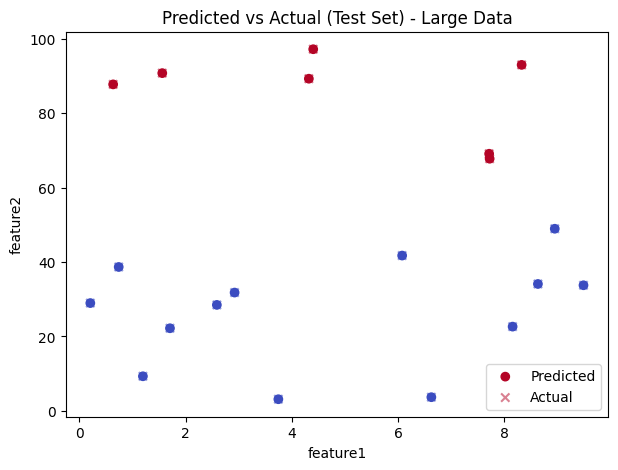

In [9]:
# Load, train, and visualize with the larger dataset
df = load_csv('large_sample_data.csv')
print('Loaded Data (first 5 rows):')
print(df.head())
model = train_model('large_sample_data.csv')

# Visualization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
if hasattr(model, 'predict'):
    y_pred = model.predict(X_test)
    plt.figure(figsize=(7,5))
    plt.scatter(X_test['feature1'], X_test['feature2'], c=y_pred, cmap='coolwarm', marker='o', label='Predicted')
    plt.scatter(X_test['feature1'], X_test['feature2'], c=y_test, cmap='coolwarm', marker='x', label='Actual', alpha=0.5)
    plt.xlabel('feature1')
    plt.ylabel('feature2')
    plt.title('Predicted vs Actual (Test Set) - Large Data')
    plt.legend(['Predicted','Actual'])
    plt.show()
else:
    print('Model does not support prediction.')